# Plot histograms and pdfs
For each of the gamma, normal, and beta distributions, use Python to do the following:
1. On the same set of axes, plot the distribution for 2 different values of its parameters.
2. Generate 100 samples from the distribution for one setting of its parameters and plot a
histogram of the sample values. On the same plot, compare the histogram to the probability
density function. The histogram will be noisy, but should align fairly well with the pdf and
look something like this:

In [11]:
import numpy as np
import scipy as sp
import scipy.stats as sts
import matplotlib.pyplot as plt
plt.style.use('seaborn')

%matplotlib inline

# Gamma Distribution

Text(0.5, 1.0, 'Gamma distribution for different values of alpha, fixing beta=0.5')

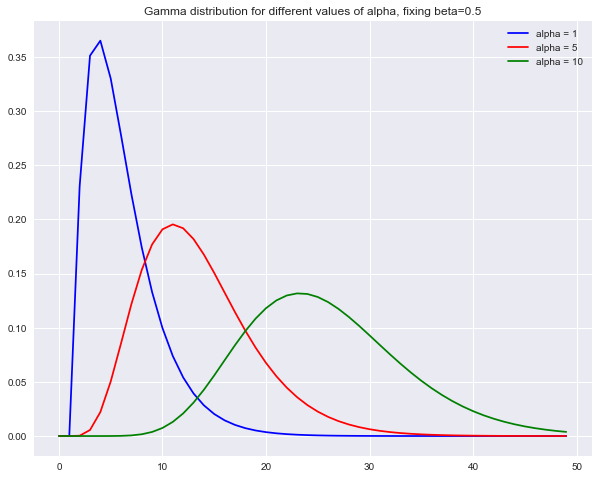

In [42]:
x = np.linspace(0, 20)
alpha_1 = 2
alpha_2 = 5
alpha_3 = 10


plt.figure(figsize=(10, 8))
plt.plot(sts.gamma.pdf(x, alpha_1, 0.5), color = 'blue', label = 'alpha = 1')
plt.plot(sts.gamma.pdf(x, alpha_2, 0.5), color = 'red', label = 'alpha = 5')
plt.plot(sts.gamma.pdf(x, alpha_3, 0.5), color = 'green', label = 'alpha = 10')
plt.legend(loc=1)
plt.title("Gamma distribution for different values of alpha, fixing beta=0.5")

Text(0.5, 1.0, 'Gamma pdf and histogram of 10000 random sample')

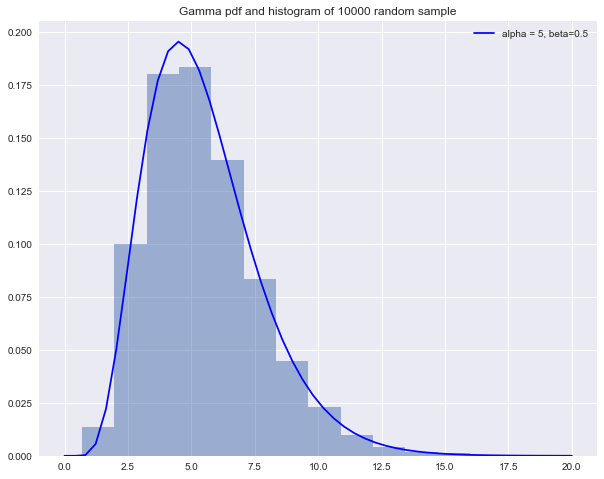

In [47]:
gamma = sts.gamma(5, 0.5)
samples = gamma.rvs(10000)


#Plot it
plt.figure(figsize=(10, 8))
plt.hist(samples, density=True,  alpha = 0.5, bins=15)
plt.plot(x, sts.gamma.pdf(x, 5, 0.5), color = 'blue', label = 'alpha = 5, beta=0.5')
plt.legend(loc=1)
plt.title("Gamma pdf and histogram of 10000 random sample")

# Normal Distribution

Text(0.5, 1.0, 'Normal distribution for different values of sigma, fixing mu=0.5')

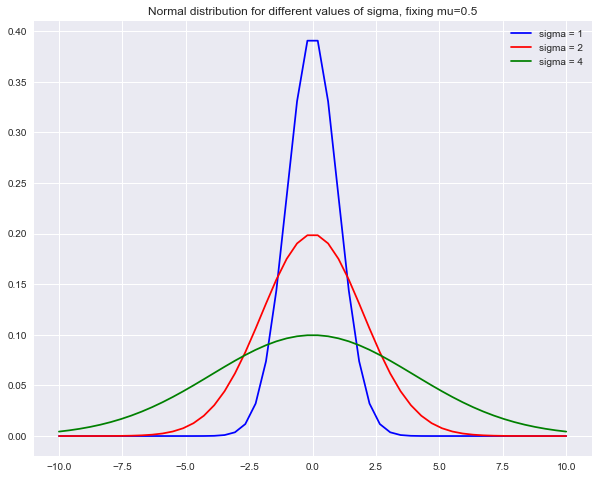

In [148]:
x = np.linspace(-10, 10)

sd1 = 1
sd2 = 2
sd3 = 4


plt.figure(figsize=(10, 8))
plt.plot(x, sts.norm.pdf(x, 0, sd1), color = 'blue', label = 'sigma = 1')
plt.plot(x, sts.norm.pdf(x, 0, sd2), color = 'red', label = 'sigma = 2')
plt.plot(x, sts.norm.pdf(x, 0, sd3), color = 'green', label = 'sigma = 4')
plt.legend(loc=1)
plt.title("Normal distribution for different values of sigma, fixing mu=0.5")

Text(0.5, 1.0, 'Gamma pdf and histogram of 10000 random sample')

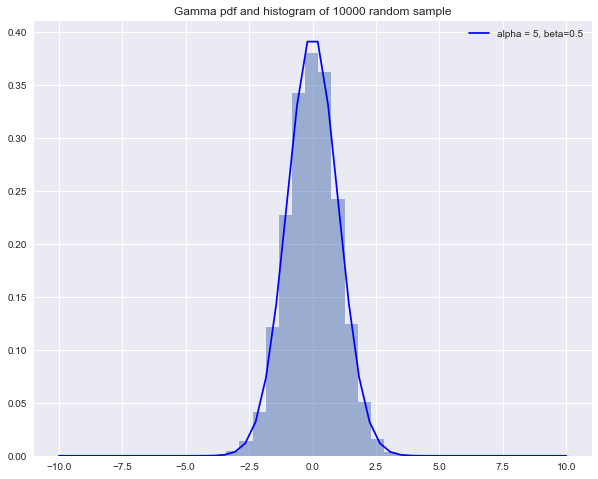

In [52]:
norm = sts.norm(0, 1)
samples = norm.rvs(10000)


#Plot it
plt.figure(figsize=(10, 8))
plt.hist(samples, density=True,  alpha = 0.5, bins=15)
plt.plot(x, sts.norm.pdf(x, 0, 1), color = 'blue', label = 'alpha = 5, beta=0.5')
plt.legend(loc=1)
plt.title("Gamma pdf and histogram of 10000 random sample")

# Beta

Text(0.5, 1.0, 'Beta distribution for different values of alpha, fixing beta=0.5')

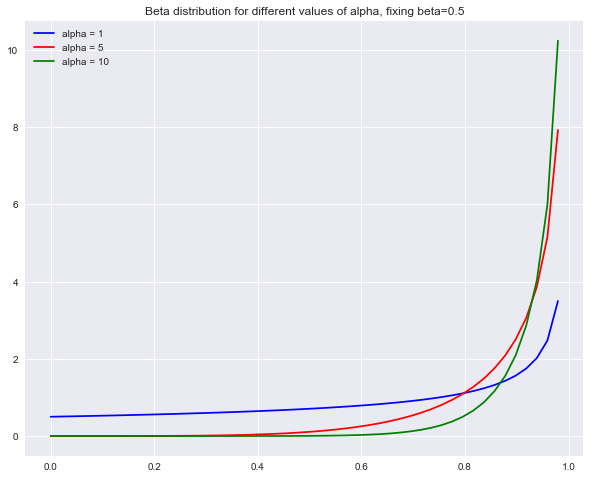

In [150]:
x = np.linspace(0, 1)
alpha_1 = 1
alpha_2 = 5
alpha_3 = 10


plt.figure(figsize=(10, 8))
plt.plot(x, sts.beta.pdf(x, alpha_1, 0.5), color = 'blue', label = 'alpha = 1')
plt.plot(x, sts.beta.pdf(x, alpha_2, 0.5), color = 'red', label = 'alpha = 5')
plt.plot(x, sts.beta.pdf(x, alpha_3, 0.5), color = 'green', label = 'alpha = 10')
plt.legend(loc=0)
plt.title("Beta distribution for different values of alpha, fixing beta=0.5")

Text(0.5, 1.0, 'Gamma pdf and histogram of 10000 random sample')

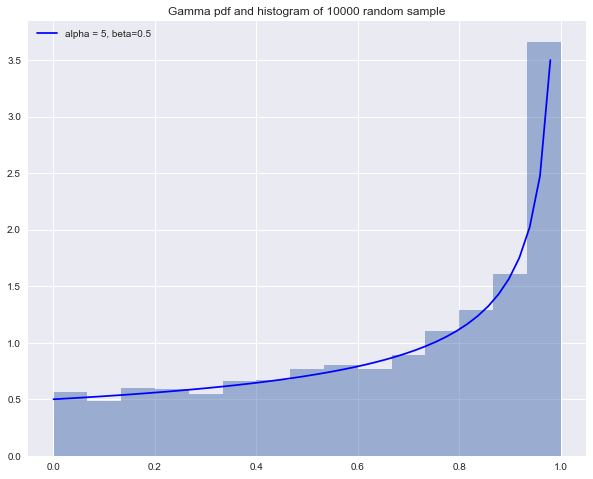

In [63]:
beta = sts.beta(1, 0.5)
samples = beta.rvs(10000)


#Plot it
plt.figure(figsize=(10, 8))
plt.hist(samples, density=True,  alpha = 0.5, bins=15)
plt.plot(x, sts.beta.pdf(x, 1, 0.5), color = 'blue', label = 'alpha = 5, beta=0.5')
plt.legend(loc=0)
plt.title("Beta pdf and histogram of 10000 random sample")

# Call center data modeling

You are advising a client on the number of call center agents they need to handle their customer support load. We start by modeling the number of phone calls we expect to come into the call center during each hour of the day.

You are provided with a data set of the intervals between phone calls arriving during one day. Each value is a time in minutes indicating the amount of time that passed between receiving two consecutive phone calls.

## Loading the data

In [102]:
import numpy as np
import scipy as sp
import scipy.stats as sts
import matplotlib.pyplot as plt

%matplotlib inline

In [103]:
# Load the data set containing durations between calls arriving at the call
# center during 1 day. All values are in minutes.
waiting_times_day = np.loadtxt('/Users/oscarengelbrektson/Downloads/call_center.csv')

# Display some basic information about the data set.
print('Size of data set:', len(waiting_times_day))
print('First 3 values in data set:', waiting_times_day[:3])
print('Sum of data set:', sum(waiting_times_day))
print("Mean of data set", np.mean(waiting_times_day))

Size of data set: 5856
First 3 values in data set: [30.   3.4  3.2]
Sum of data set: 1441.6838153800093
Mean of data set 0.24618917612363386


Since the values are intervals between calls measured in minutes, this means

* we assume the first call happened at 00:00 (midnight),
* the second call happened at about 00:30 (30 minutes after midnight),
* the third call happened at about 00:33 (30 + 3.4 minutes),
* the fourth call happened at about 00:37, etc.

When we sum the values, we get about 1440 minutes (1 day).

You are told that the number of calls arriving varies quite a lot, depending on which hour of the day it is. The smallest number of calls usually occur around 3am or 4am. Most calls usually come in between 11am and 1pm.

## Data pre-processing
Since we expect different call rates during different hours, we split the data set into 24 separate series — one for each hour of the day.

In [104]:
# Make 24 empty lists, one per hour.
waiting_times_per_hour = [[] for _ in range(24)]

# Split the data into 24 separate series, one for each hour of the day.
current_time = 0
for t in waiting_times_day:
    current_hour = int(current_time // 60)
    current_time += t
    waiting_times_per_hour[current_hour].append(t)

for hour, calls_in_hour in enumerate(waiting_times_per_hour):
    print(f'{hour:02}:00-{hour + 1:02}:00 - {len(calls_in_hour)} calls')

00:00-01:00 - 5 calls
01:00-02:00 - 4 calls
02:00-03:00 - 6 calls
03:00-04:00 - 8 calls
04:00-05:00 - 26 calls
05:00-06:00 - 53 calls
06:00-07:00 - 93 calls
07:00-08:00 - 173 calls
08:00-09:00 - 254 calls
09:00-10:00 - 345 calls
10:00-11:00 - 496 calls
11:00-12:00 - 924 calls
12:00-13:00 - 858 calls
13:00-14:00 - 382 calls
14:00-15:00 - 185 calls
15:00-16:00 - 207 calls
16:00-17:00 - 263 calls
17:00-18:00 - 419 calls
18:00-19:00 - 531 calls
19:00-20:00 - 400 calls
20:00-21:00 - 137 calls
21:00-22:00 - 51 calls
22:00-23:00 - 20 calls
23:00-24:00 - 16 calls


## Task 1: Plot the number of calls per hour
Use Matplotlib to visualize the number of calls that arrive during each hour of the day, stored in the variable `waiting_times_per_hour`. The call numbers are shown in the output above. You should find an appropriate way to visualize it.

<BarContainer object of 24 artists>

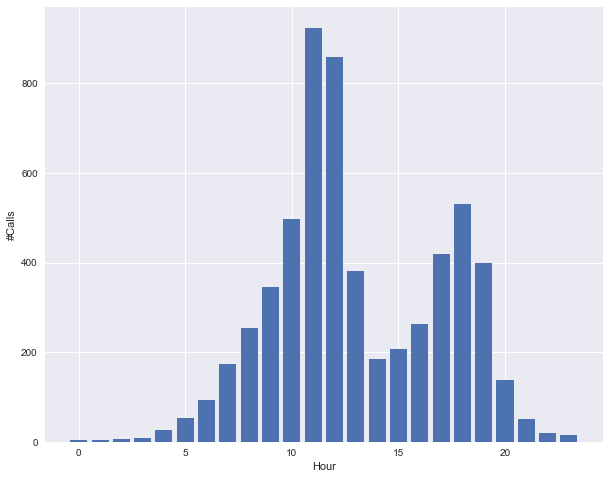

In [105]:
x = list(range(len(waiting_times_per_hour)))
bar_y = [len(waiting_times_per_hour[x]) for x in range(len(waiting_times_per_hour))]

plt.figure(figsize=(10, 8))
plt.xlabel('Hour')
plt.ylabel("#Calls")
plt.bar(x, bar_y)

## Task 2: Plot a histogram of the durations for one hour
Take the data for the 9th hour (so between 9am and 10am) and plot a histogram showing the distribution over waiting times between calls during that hour.

(array([4.17102589, 1.85131096, 0.7806733 , 0.51301388, 0.24535446,
        0.0446099 , 0.0446099 , 0.02230495, 0.        , 0.02230495]),
 array([4.900000e-04, 1.304410e-01, 2.603920e-01, 3.903430e-01,
        5.202940e-01, 6.502450e-01, 7.801960e-01, 9.101470e-01,
        1.040098e+00, 1.170049e+00, 1.300000e+00]),
 <a list of 10 Patch objects>)

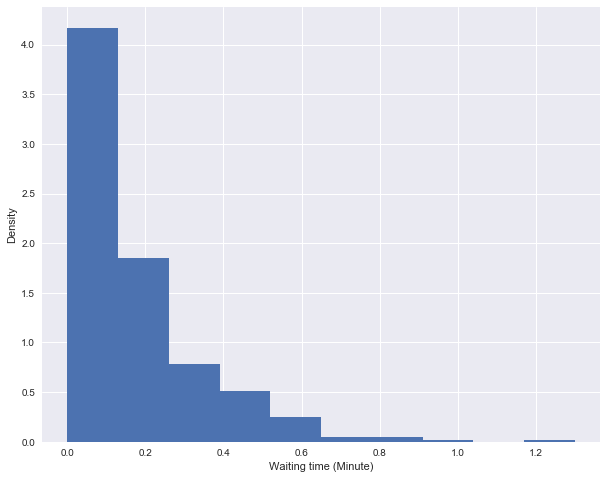

In [107]:
hour9 = waiting_times_per_hour[9]

plt.figure(figsize=(10, 8))
plt.xlabel('Waiting time (Minute)')
plt.ylabel("Density")
plt.hist(hour9, density=True)

## Task 3: Guess the distribution
What type of distribution best represents the data in your histogram?

* Identify a type of distribution. **In class you will use this distribution as your likelihood function in a Bayesian inference problem.**
* Guess what the parameters of the distribution are. (This is just a guess for now. In class we will infer the values of the parameters.)
* Plot the pdf of your best guess on top of your histogram, to see if they match.
* **Important:** You have to normalize your histogram so that it will have the same vertical scale as the plot of the pdf. You can normalize a histogram by using the argument `density=True` in the `hist` function.

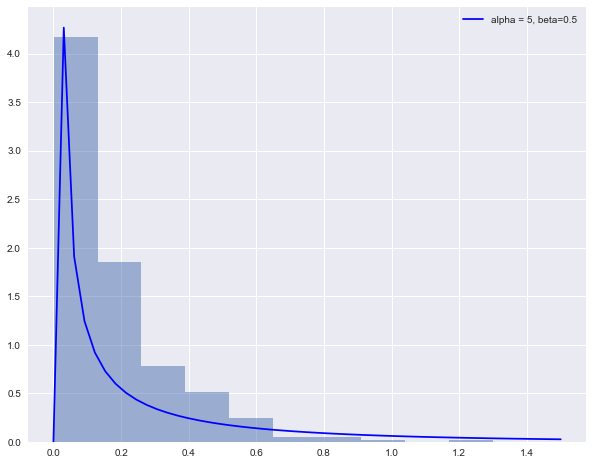

In [154]:
x = np.linspace(0, 1.5)
sts.expon.pdf(0.1)

#Plot it
plt.figure(figsize=(10, 8))
plt.hist(hour9, density=True,  alpha = 0.5)
plt.plot(x, sts.gamma.pdf(x, 0.15, 0.01), color = 'blue', label = 'alpha = 5, beta=0.5')
plt.legend(loc=1)
